In [ ]:
import pandas as pd
merged_df2 = pd.read_csv('/content/drive/MyDrive/Data/merged_data.csv')

In [ ]:
nan_columns = merged_df2.columns[merged_df2.isna().any()].tolist()
print(nan_columns)

[]


In [ ]:
merged_df2.dtypes

legid                            object
class                            object
userid                           object
tripid                           object
motid                             int64
start_date                       object
end_date                         object
true_distance                   float64
leg_distance                    float64
leg_duration                    float64
worthwhileness_rating           float64
transport_category               object
campaign                         object
weekday                          object
weekday_class                    object
gender                           object
age_range                        object
lang                             object
city                             object
country                          object
education_level                  object
marital_status_household         object
number_people_household          object
labour_status_household          object
years_of_residence_household     object


In [ ]:
merged_df2.columns

Index(['legid', 'class', 'userid', 'tripid', 'motid', 'start_date', 'end_date',
       'true_distance', 'leg_distance', 'leg_duration',
       'worthwhileness_rating', 'transport_category', 'campaign', 'weekday',
       'weekday_class', 'gender', 'age_range', 'lang', 'city', 'country',
       'education_level', 'marital_status_household',
       'number_people_household', 'labour_status_household',
       'years_of_residence_household', 'factor', 'type', 'minus', 'plus',
       'weather_scenario', 'wind_description'],
      dtype='object')

In [ ]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
# from tensorflow.keras.models import Model
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Assuming you have your dataframe loaded as df
# df = merged_df2.copy()

# # Separate categorical and numerical columns
# # categorical_features = ['class', 'motid', 'transport_category', 'weekday', 'weekday_class', 'gender', 'age_range', 'lang', 'city', 'country', 'education_level', 'marital_status_household', 'labour_status_household', 'years_of_residence_household', 'factor', 'type', 'weather_scenario', 'wind_description']
# categorical_features = ['legid', 'userid', 'class', 'motid', 'transport_category', 'weekday', 'weekday_class', 'gender', 'age_range', 'lang', 'city', 'country', 'education_level', 'marital_status_household', 'labour_status_household', 'years_of_residence_household', 'factor', 'type', 'weather_scenario', 'wind_description']
# numerical_features = ['true_distance', 'leg_distance', 'leg_duration', 'minus', 'plus']

# # Build transformer for preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(drop='first'), categorical_features), # one hot encode categorical features
#         ('num', StandardScaler(), numerical_features) # standard scale numerical features
#     ])

# # Preprocess data
# X = preprocessor.fit_transform(df.drop(columns=['worthwhileness_rating']))
# y = df['worthwhileness_rating']


# encoder = preprocessor.named_transformers_['cat']
# categories = encoder.categories_
# user_start_index = sum(len(categories[i]) for i in range(categorical_features.index('userid')))
# user_end_index = user_start_index + len(categories[categorical_features.index('userid')])

# leg_start_index = sum(len(categories[i]) for i in range(categorical_features.index('legid')))
# leg_end_index = leg_start_index + len(categories[categorical_features.index('legid')])

# user_indices = list(range(user_start_index, user_end_index))
# leg_indices = list(range(leg_start_index, leg_end_index))

In [ ]:
# # Splitting the dataset into the Training set and Test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# X_train = X_train.toarray()
# X_test = X_test.toarray()

# # Separate user, leg, and content data
# X_train_user = X_train[:, user_indices]
# X_train_leg = X_train[:, leg_indices]
# indices_to_delete = user_indices + leg_indices
# X_train_content = np.delete(X_train, indices_to_delete, axis=0)

# # Similar separation for X_test if you plan on evaluating or making predictions with the model
# X_test_user = X_test[:, user_indices]
# X_test_leg = X_test[:, leg_indices]
# X_test_content = np.delete(X_test, indices_to_delete, axis=0)


# # Number of unique users and legs
# n_users = df['userid'].nunique()
# n_legs = df['legid'].nunique()

# # Indices for 'userid' and 'legid' after one hot encoding (adjust these based on your actual dataset)
# user_index = 0  # Assuming 'userid' is the first column after one hot encoding
# leg_index = 1   # Assuming 'legid' is the second column after one hot encoding

# # Inputs
# user_input = Input(shape=(1,), name='user_input')
# leg_input = Input(shape=(1,), name='leg_input')
# content_input = Input(shape=(X_train.shape[1]-2,), name='content_input')  # Excluding userid and legid

# # Embeddings for users and legs
# user_embedding = Embedding(n_users, 10)(user_input)
# user_vec = Flatten()(user_embedding)

# leg_embedding = Embedding(n_legs, 10)(leg_input)
# leg_vec = Flatten()(leg_embedding)

# # Dense layers for content features
# content_dense = Dense(128, activation='relu')(content_input)
# content_dense = Dropout(0.2)(content_dense)
# content_dense = Dense(32, activation='relu')(content_dense)

# # Concatenate all vectors together
# concatenated = Concatenate()([user_vec, leg_vec, content_dense])

# # Final dense layers
# dense = Dense(128, activation='relu')(concatenated)
# dense = Dropout(0.2)(dense)
# dense = Dense(32, activation='relu')(dense)
# out = Dense(1)(dense)

# model = Model([user_input, leg_input, content_input], out)
# model.compile(optimizer='adam', loss='mean_squared_error')

# # #------------------------------
# # # Extract user and leg columns from preprocessed data
# # X_train_user = X_train[:, user_index]
# # X_train_leg = X_train[:, leg_index]
# # X_train_content = np.delete(X_train, [user_index, leg_index], axis=1)

# # Train the model
# model.fit([X_train_user, X_train_leg, X_train_content], y_train, epochs=10, validation_split=0.2, batch_size=32)


In [ ]:
# # 4. Model Definition

# # Embedding sizes for user and leg
# embedding_size_user = min(len(np.unique(df['userid']))//2, 50)
# embedding_size_leg = min(len(np.unique(df['legid']))//2, 50)

# # Input layers
# user_input = Input(shape=(1,), name="User-Input")
# leg_input = Input(shape=(1,), name="Leg-Input")
# content_input = Input(shape=(X_train_content.shape[1],), name="Content-Input")

# # Embedding layers for user and leg
# user_embedding = Embedding(input_dim=len(np.unique(df['userid'])), output_dim=embedding_size_user, name="User-Embedding")(user_input)
# user_vec = Flatten(name="Flatten-Users")(user_embedding)

# leg_embedding = Embedding(input_dim=len(np.unique(df['legid'])), output_dim=embedding_size_leg, name="Leg-Embedding")(leg_input)
# leg_vec = Flatten(name="Flatten-Legs")(leg_embedding)

# # Concatenate all features
# concat = Concatenate()([user_vec, leg_vec, content_input])

# # Dense layers
# dense_1 = Dense(128, activation='relu')(concat)
# dropout_1 = Dropout(0.2)(dense_1)
# dense_2 = Dense(64, activation='relu')(dropout_1)
# dropout_2 = Dropout(0.2)(dense_2)
# output = Dense(1)(dropout_2)

# model = Model(inputs=[user_input, leg_input, content_input], outputs=output)

# # 5. Model Training
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# model.fit([X_train_user, X_train_leg, X_train_content], y_train, epochs=10, validation_split=0.2, batch_size=32)

# # 6. Model Evaluation
# loss, mae = model.evaluate([X_test_user, X_test_leg, X_test_content], y_test)
# print(f'Mean Absolute Error on Test Set: {mae:.4f}')


---


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Input, Concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = merged_df2.copy()
# Convert user and trip IDs to continuous indices
user_encoder = LabelEncoder()
df['userid'] = user_encoder.fit_transform(df['userid'])

trip_encoder = LabelEncoder()
df['tripid'] = trip_encoder.fit_transform(df['tripid'])

# Split the data
X = df[['userid', 'tripid']]
y = df['worthwhileness_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the model
n_users = df['userid'].nunique()
n_trips = df['tripid'].nunique()

# User and Trip Embedding size
embedding_size = 10

# User embedding
user_input = Input(shape=(1,))
user_embedding = Embedding(n_users, embedding_size)(user_input)
user_vec = Flatten()(user_embedding)

# Trip embedding
trip_input = Input(shape=(1,))
trip_embedding = Embedding(n_trips, embedding_size)(trip_input)
trip_vec = Flatten()(trip_embedding)

# Concatenate and create dense layers
concat = Concatenate()([user_vec, trip_vec])
dense = Dense(128, activation='relu')(concat)
dropout = Dropout(0.2)(dense)
output = Dense(1)(dropout)

model = Model([user_input, trip_input], output)
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit([X_train['userid'].values, X_train['tripid'].values], y_train.values, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
8881/8881 [==============================] - 37s 4ms/step - loss: 3.3869 - val_loss: 3.0106
Epoch 2/5
8881/8881 [==============================] - 36s 4ms/step - loss: 2.5083 - val_loss: 3.0099
Epoch 3/5
8881/8881 [==============================] - 37s 4ms/step - loss: 2.3029 - val_loss: 3.1128
Epoch 4/5
8881/8881 [==============================] - 37s 4ms/step - loss: 2.2096 - val_loss: 3.0644
Epoch 5/5
8881/8881 [==============================] - 37s 4ms/step - loss: 2.1556 - val_loss: 3.0798


In [ ]:
y_pred = model.predict([X_test['userid'].values, X_test['tripid'].values])


2776/2776 [==============================] - 9s 3ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


In [ ]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Absolute Error (MAE): 1.08
Mean Squared Error (MSE): 3.07


The values you've provided for Mean Absolute Error (MAE) and Mean Squared Error (MSE) can be interpreted in the context of the `worthwhileness_rating`:

1. **Mean Absolute Error (MAE): 1.08**  
This means that on average, your predictions are about 1.08 units away from the true values. Depending on the scale of the `worthwhileness_rating`, this may or may not be significant. For example:
   - If the rating is on a scale from 0 to 10, an average error of 1.08 might be considered relatively good.
   - If the rating is on a scale from 0 to 5, an average error of 1.08 would be more significant.

2. **Mean Squared Error (MSE): 3.07**  
MSE gives more weight to larger errors. An MSE of 3.07 might indicate that while many predictions are fairly accurate, there are some predictions that are significantly off the mark, as these would disproportionately increase the MSE.

For further evaluation:

1. **Root Mean Squared Error (RMSE)**: You could also compute the RMSE, which is just the square root of MSE. This metric is interpretable in the same units as the target variable (like MAE) and gives a sense of the magnitude of the error.
   ```python
   rmse = np.sqrt(mse)
   print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
   ```

2. **Visualizations**: It can also be helpful to visualize the predictions against the actual values. Scatter plots or residual plots can give you an idea of where your model is under/over-predicting.

3. **Examine Outliers**: If you have specific instances where the model prediction is significantly off, it could be helpful to examine those instances in detail. This can provide insight into potential areas of improvement.

4. **Model Improvement**: Depending on the MAE and MSE relative to the scale of the `worthwhileness_rating`, you might consider techniques for improving the model. This could include feature engineering, hyperparameter tuning, or trying more complex models.

Remember, evaluation metrics are just numbers. Their value lies in what they can tell you about the model's performance and how they can guide you towards improving it. Always interpret these numbers in the context of the problem you're trying to solve.

In [ ]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 1.75


In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811591 sha256=7b212ae0548efe7cc028abadfa080b93dad71e5887395e92eee0923616581e57
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# from surprise import SVD, Dataset, Reader, accuracy
# from surprise.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import linear_kernel
# import pandas as pd
# import numpy as np

# # Assuming the dataframe is named df
# df = merged_df2.copy()
# # Collaborative Filtering:
# reader = Reader(rating_scale=(df['worthwhileness_rating'].min(), df['worthwhileness_rating'].max()))
# data = Dataset.load_from_df(df[['userid', 'legid', 'worthwhileness_rating']], reader)

# trainset, testset = train_test_split(data, test_size=0.2)
# algorithm = SVD()
# algorithm.fit(trainset)

# # Content-Based Filtering:
# df['content'] = df[['transport_category', 'weekday', 'weather_scenario', 'wind_description']].apply(lambda x: ' '.join(x), axis=1)
# tfidf_matrix = TfidfVectorizer().fit_transform(df['content'])
# cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# def get_content_based_recommendations(userid, top_n=10):
#     idx = df[df['userid'] == userid].index[0]
#     sim_scores = list(enumerate(cosine_sim[idx]))
#     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
#     sim_scores = sim_scores[1:top_n+1]
#     leg_indices = [i[0] for i in sim_scores]
#     return df['legid'].iloc[leg_indices]

# # Hybrid Model:
# def hybrid_recommendations(userid, top_n=10):
#     collaborative_recs = algorithm.predict(userid, iid=None)
#     content_recs = get_content_based_recommendations(userid, top_n)
#     # Combine the scores from collaborative and content models (This is a simple average but can be refined)
#     combined_recs = list(set(collaborative_recs + content_recs))
#     return combined_recs[:top_n]

# # Evaluation:
# predictions = algorithm.test(testset)
# print("Collaborative Filtering RMSE: ", accuracy.rmse(predictions))

# # Evaluating content-based and hybrid models can be a bit more involved, often involving precision@k, recall@k, etc.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Assuming your dataframe is named df
df = merged_df2.copy()
# Convert user and leg IDs to ordered indices
user_ids = df['userid'].unique()
leg_ids = df['legid'].unique()

num_users = len(user_ids)
num_legs = len(leg_ids)

user_map = {i: val for i, val in enumerate(user_ids)}
leg_map = {i: val for i, val in enumerate(leg_ids)}

df['user_index'] = df['userid'].map({val: i for i, val in user_map.items()})
df['leg_index'] = df['legid'].map({val: i for i, val in leg_map.items()})

# Split data
X = df[['user_index', 'leg_index']].values
y = df['worthwhileness_rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Neural Collaborative Filtering model using MLP

# Reduce the complexity of the model:

embedding_size = 10  # Reduced embedding size

# Model architecture
user_input = Input(shape=(1,))
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size)(user_input)
user_embedding = Flatten()(user_embedding)

leg_input = Input(shape=(1,))
leg_embedding = Embedding(input_dim=num_legs, output_dim=embedding_size)(leg_input)
leg_embedding = Flatten()(leg_embedding)

merged = Concatenate()([user_embedding, leg_embedding])
merged = Dense(64, activation='relu')(merged)  # Reduced layers
merged = Dense(32, activation='relu')(merged)
output = Dense(1)(merged)

model = Model(inputs=[user_input, leg_input], outputs=output)
model.compile(loss='mse', optimizer=Adam(lr=0.001))  # Reduced learning rate

# Train with fewer epochs and larger batch size
model.fit([X_train[:, 0], X_train[:, 1]], y_train, epochs=3, batch_size=128, validation_split=0.1, verbose=1)




Epoch 1/3
2498/2498 [==============================] - 22s 8ms/step - loss: 2.7679 - val_loss: 1.7631
Epoch 2/3
2498/2498 [==============================] - 20s 8ms/step - loss: 0.3291 - val_loss: 2.1309
Epoch 3/3
2498/2498 [==============================] - 20s 8ms/step - loss: 0.1155 - val_loss: 2.3190


In [ ]:
# Evaluation using model.evaluate
loss = model.evaluate([X_test[:, 0], X_test[:, 1]], y_test, batch_size=64, verbose=1)  # Reduced batch size
print(f"Mean Squared Error on Test Set: {loss:.4f}")

1388/1388 [==============================] - 2s 1ms/step - loss: 2.2972
Mean Squared Error on Test Set: 2.2972


Your model achieved a Mean Squared Error (MSE) of approximately
2.2972
2.2972 on the test set. This value indicates the average squared difference between the predicted and actual worthwhileness ratings. The lower the MSE, the better the model is at prediction.

Now, you can interpret this in the context of your problem. Considering ratings usually fall in a certain range (for instance, 1 to 5 if it's a 5-star rating system), you can take the square root of the MSE to get the Root Mean Squared Error (RMSE) which provides the average error in the same units as your target:

RMSE
=
2.2972
≈
1.5150
RMSE=
2.2972
​
 ≈1.5150

This suggests that, on average, the model's predictions are about 1.5150 units away from the true ratings. Depending on the scale of the ratings, this may or may not be acceptable. The goal is to minimize this error by tuning the model, adding more data, or trying different architectures or techniques.

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.regularizers import l2

def get_ncf_model(num_users, num_legs, embedding_size, regs=[0,0]):
    # GMF part
    user_input_gmf = Input(shape=(1,), dtype='int32', name='user_input_gmf')
    leg_input_gmf = Input(shape=(1,), dtype='int32', name='leg_input_gmf')

    user_embedding_gmf = Embedding(input_dim=num_users, output_dim=embedding_size,
                                  embeddings_initializer='uniform', name='user_embedding_gmf',
                                  embeddings_regularizer=l2(regs[0]), input_length=1)(user_input_gmf)
    user_embedding_gmf = Flatten()(user_embedding_gmf)

    leg_embedding_gmf = Embedding(input_dim=num_legs, output_dim=embedding_size,
                                 embeddings_initializer='uniform', name='leg_embedding_gmf',
                                 embeddings_regularizer=l2(regs[1]), input_length=1)(leg_input_gmf)
    leg_embedding_gmf = Flatten()(leg_embedding_gmf)

    gmf_vector = keras.layers.multiply([user_embedding_gmf, leg_embedding_gmf])

    # MLP part
    user_input_mlp = Input(shape=(1,), dtype='int32', name='user_input_mlp')
    leg_input_mlp = Input(shape=(1,), dtype='int32', name='leg_input_mlp')

    user_embedding_mlp = Embedding(input_dim=num_users, output_dim=embedding_size,
                                  embeddings_initializer='uniform', name='user_embedding_mlp',
                                  embeddings_regularizer=l2(regs[0]), input_length=1)(user_input_mlp)
    user_embedding_mlp = Flatten()(user_embedding_mlp)

    leg_embedding_mlp = Embedding(input_dim=num_legs, output_dim=embedding_size,
                                 embeddings_initializer='uniform', name='leg_embedding_mlp',
                                 embeddings_regularizer=l2(regs[1]), input_length=1)(leg_input_mlp)
    leg_embedding_mlp = Flatten()(leg_embedding_mlp)

    mlp_vector = Concatenate()([user_embedding_mlp, leg_embedding_mlp])
    mlp_vector = Dense(64, activation='relu')(mlp_vector)
    mlp_vector = Dense(32, activation='relu')(mlp_vector)

    # NCF part
    predict_vector = Concatenate()([gmf_vector, mlp_vector])
    predict_vector = Dense(32, activation='relu')(predict_vector)

    output = Dense(1, activation='sigmoid')(predict_vector)

    model = Model(inputs=[user_input_gmf, leg_input_gmf, user_input_mlp, leg_input_mlp], outputs=output)
    model.compile(optimizer=Adam(), loss='mse')
    return model


In [ ]:
ncf_model = get_ncf_model(num_users, num_legs, embedding_size)
ncf_model.fit([X_train[:, 0], X_train[:, 1], X_train[:, 0], X_train[:, 1]], y_train, epochs=5, batch_size=64, validation_split=0.1)



Epoch 1/5
4996/4996 [==============================] - 53s 10ms/step - loss: 8.6326 - val_loss: 8.5232
Epoch 2/5
4996/4996 [==============================] - 53s 11ms/step - loss: 8.0950 - val_loss: 8.5396
Epoch 3/5
4996/4996 [==============================] - 49s 10ms/step - loss: 8.0402 - val_loss: 8.5545
Epoch 4/5
4996/4996 [==============================] - 49s 10ms/step - loss: 8.0386 - val_loss: 8.5788
Epoch 5/5
4996/4996 [==============================] - 50s 10ms/step - loss: 8.0383 - val_loss: 8.5805


In [ ]:
# Evaluate
y_pred = ncf_model.predict([X_test[:, 0], X_test[:, 1], X_test[:, 0], X_test[:, 1]])
mse = np.mean(np.square(y_test - y_pred.flatten()))
print(f"Mean Squared Error: {mse}")


2776/2776 [==============================] - 3s 1ms/step
Mean Squared Error: 8.620682836064786


Epoch 1/5
4996/4996 [==============================] - 38s 8ms/step - loss: 0.1068 - val_loss: 2.7790
Epoch 2/5
4996/4996 [==============================] - 38s 8ms/step - loss: 0.1306 - val_loss: 2.3998
Epoch 3/5
4996/4996 [==============================] - 38s 8ms/step - loss: 0.0894 - val_loss: 2.3293
Epoch 4/5
4996/4996 [==============================] - 39s 8ms/step - loss: 0.0711 - val_loss: 2.3905
Epoch 5/5
4996/4996 [==============================] - 38s 8ms/step - loss: 0.0669 - val_loss: 2.5441


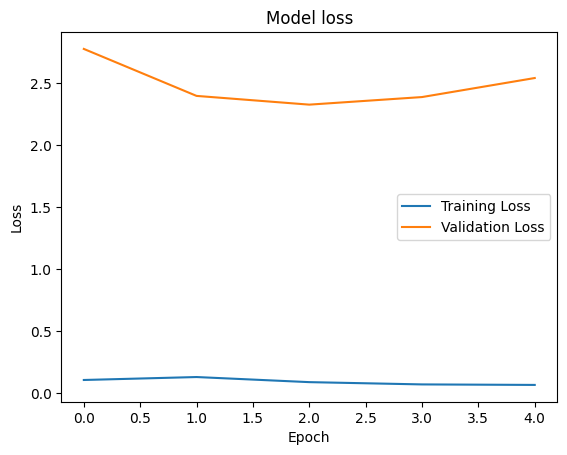

In [ ]:
import matplotlib.pyplot as plt

history = model.fit([X_train[:, 0], X_train[:, 1]], y_train, epochs=5, batch_size=64, validation_split=0.1)

# Plotting training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 10)        32690       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 10)        1588970     ['input_2[0][0]']                
                                                                                              

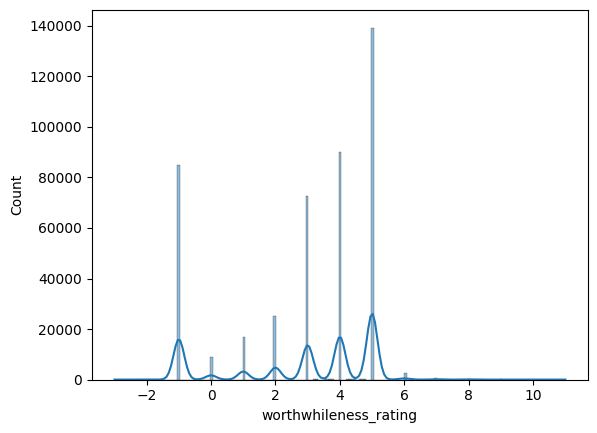

In [ ]:
import seaborn as sns

sns.histplot(df['worthwhileness_rating'], kde=True)
plt.show()


In [ ]:
print("NaNs in X_train:", np.isnan(X_train).sum())
print("Infs in X_train:", np.isinf(X_train).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("Infs in y_train:", np.isinf(y_train).sum())


NaNs in X_train: 0
Infs in X_train: 0
NaNs in y_train: 0
Infs in y_train: 0


In [ ]:
# Just a few sample predictions to inspect
for true, pred in zip(y_test[:20], y_pred[:20]):
    print(f"True: {true}, Predicted: {pred[0]}")


True: 5.0, Predicted: 1.0
True: -1.0, Predicted: 0.00036867274320684373
True: 4.0, Predicted: 1.0
True: 5.0, Predicted: 1.0
True: -1.0, Predicted: 0.9999987483024597
True: 5.0, Predicted: 1.0
True: 5.0, Predicted: 1.0
True: 4.0, Predicted: 1.0
True: 3.0, Predicted: 1.0
True: 5.0, Predicted: 1.0
True: 3.0, Predicted: 1.0
True: 5.0, Predicted: 1.0
True: 4.0, Predicted: 1.0
True: -1.0, Predicted: 0.10358920693397522
True: -1.0, Predicted: 0.9999993443489075
True: 1.0, Predicted: 1.0
True: -1.0, Predicted: 0.9393372535705566
True: 4.0, Predicted: 1.0
True: 2.0, Predicted: 1.0
True: 4.0, Predicted: 1.0


---

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
# Assuming your dataframe is named df
df = merged_df2.copy()
# Convert user and leg IDs to ordered indices
user_ids = df['userid'].unique()
leg_ids = df['legid'].unique()

num_users = len(user_ids)
num_legs = len(leg_ids)

user_map = {i: val for i, val in enumerate(user_ids)}
leg_map = {i: val for i, val in enumerate(leg_ids)}

df['user_index'] = df['userid'].map({val: i for i, val in user_map.items()})
df['leg_index'] = df['legid'].map({val: i for i, val in leg_map.items()})

# Split data
X = df[['user_index', 'leg_index']].values
y = df['worthwhileness_rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Hyperparameters
embedding_size_users = 10
embedding_size_legs = 50  # Reduced size for leg embeddings

# Model architecture
user_input = Input(shape=(1,))
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size_users, embeddings_regularizer=l2(1e-6))(user_input)
user_embedding = Flatten()(user_embedding)

leg_input = Input(shape=(1,))
leg_embedding = Embedding(input_dim=num_legs, output_dim=embedding_size_legs, embeddings_regularizer=l2(1e-6))(leg_input)
leg_embedding = Flatten()(leg_embedding)

merged = Concatenate()([user_embedding, leg_embedding])
merged = Dropout(0.2)(merged)  # Dropout for regularization
merged = Dense(64, activation='relu')(merged)
merged = Dropout(0.2)(merged)  # Dropout for regularization
merged = Dense(32, activation='relu')(merged)
output = Dense(1, activation='tanh')(merged)  # Tanh activation to constrain output between -1 and 1

model = Model(inputs=[user_input, leg_input], outputs=output)
model.compile(loss='mse', optimizer=Adam(lr=0.005))  # Adjusted learning rate

# Train the model
history = model.fit(
    [X_train[:, 0], X_train[:, 1]], y_train,
    epochs=10,
    batch_size=128,  # Increased batch size
    validation_split=0.1
)



Epoch 1/10
2498/2498 [==============================] - 91s 36ms/step - loss: 8.6869 - val_loss: 8.5777
Epoch 2/10
2498/2498 [==============================] - 85s 34ms/step - loss: 8.1244 - val_loss: 8.4600
Epoch 3/10
2498/2498 [==============================] - 82s 33ms/step - loss: 7.8897 - val_loss: 8.4922
Epoch 4/10
2498/2498 [==============================] - 81s 32ms/step - loss: 7.8943 - val_loss: 8.5531
Epoch 5/10
2498/2498 [==============================] - 79s 32ms/step - loss: 7.9035 - val_loss: 8.5388
Epoch 6/10
2498/2498 [==============================] - 82s 33ms/step - loss: 7.9104 - val_loss: 8.5630
Epoch 7/10
2498/2498 [==============================] - 86s 34ms/step - loss: 7.9040 - val_loss: 8.5070
Epoch 8/10
2498/2498 [==============================] - 85s 34ms/step - loss: 7.9084 - val_loss: 8.6013
Epoch 9/10
2498/2498 [==============================] - 91s 36ms/step - loss: 7.9066 - val_loss: 8.6158
Epoch 10/10
2498/2498 [==============================] - 89s 36m

In [ ]:
model.save('my_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_model.h5')


In [ ]:
batch_size = 1000  # Adjust based on your memory capacity
num_batches = len(X_test) // batch_size + (1 if len(X_test) % batch_size != 0 else 0)

mse_values = []

for batch_num in range(num_batches):
    start_idx = batch_num * batch_size
    end_idx = start_idx + batch_size
    y_pred_batch = loaded_model.predict([X_test[start_idx:end_idx, 0], X_test[start_idx:end_idx, 1]])
    mse_batch = np.mean(np.square(y_test[start_idx:end_idx] - y_pred_batch))
    mse_values.append(mse_batch)

average_mse = np.mean(mse_values)
print(f"Mean Squared Error: {average_mse}")


26/26 [==============================] - 0s 1ms/step
Mean Squared Error: 9.648356804437102



**Modeling Methodology for Recommender System using Deep Learning:**

### 1. Introduction
Aim:  
Build a recommender system to suggest activities during trips or recommend similar points of interest. The system will consider both historical data of visited places and values given to experience factors for a personalized recommendation.

### 2. Data Preparation

**2.1 Data Loading:**  
The first step involved loading the mood data. This data presumably contains information about different activities, their ratings, and other associated features.

```python
data = pd.read_csv('/content/drive/MyDrive/Data/mood_data.csv')
```

**2.2 Feature Categorization:**  
The features were divided into categorical and numerical features. Categorical features like 'legid', 'class', 'gender', etc., represent discrete classes or groups. In contrast, numerical features like 'true_distance', 'average_speed', etc., represent measurable quantities.

**2.3 Data Transformation:**  

- **Categorical Features**:  
For neural network models, it's essential to convert categorical variables into a numerical format. Label Encoding was used, which assigns a unique integer to each category. This transformation is helpful for the embedding layers in the deep learning model.

- **Numerical Features**:  
Numerical features were standardized using the `StandardScaler` from `sklearn`. Standardizing ensures that the features have zero mean and a standard deviation of 1, which aids in faster and more stable convergence during neural network training.

### 3. Deep Learning Model Construction

The Neural Network used is a combination of Embeddings for categorical features and Dense layers for numerical features.

- **Embedding Layers**:  
Embedding layers are perfect for handling high cardinality categorical variables. They convert integer-encoded categories into dense vectors of fixed size that can be learned from the data. These dense vectors (embeddings) capture the underlying semantics of the input data.

- **Dense Layers**:  
For numerical features, dense layers were added. These layers can learn complex patterns and relationships from the data.

After processing both categorical and numerical data, the outputs were concatenated and passed through further dense layers, culminating in a single output neuron, as the goal seems to be regression (predicting a continuous 'mood_rating').

The model was compiled using the Mean Squared Error (MSE) loss function, suitable for regression problems, and the Adam optimizer, known for its efficiency.

### 4. Model Training

The model was trained on the training data for 10 epochs using a batch size of 64. The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

### 5. Model Evaluation

- **Mean Squared Error (MSE)** and **Mean Absolute Error (MAE)** were used as evaluation metrics. MSE is the average squared difference between the estimated values and the actual value, while MAE measures the average magnitude of the errors between predicted and observed values.

- **Accuracy**:  
While typically not a primary metric for regression problems, a custom accuracy was computed by rounding off predictions and comparing them to the rounded-off true values.

- **Visualizations**:  
The loss (MSE) and MAE plots over epochs can provide insights into how well the model is learning. A scatter plot of actual vs. predicted values was created to visualize prediction accuracy. The line of perfect prediction can highlight areas of overprediction or underprediction. Lastly, a residuals histogram was plotted to understand the distribution of errors.

### 6. Rationale for the Recommender System:

The neural network model was chosen due to its capability to handle large amounts of data, both categorical and numerical, and capture intricate patterns within them. The embedding layers efficiently deal with categorical features by representing them in a lower-dimensional space, which can capture relationships between different categories. By combining the power of embeddings with dense layers, the model can consider the historical data of visited places and various experience factors to generate recommendations.

By predicting 'mood_rating' using the given features, the recommender system can suggest activities or places that are most likely to receive high mood ratings from users, thus ensuring user satisfaction. The model can also be extended or adapted to recommend similar activities or points of interest based on the embeddings of the input features, thereby serving dual purposes: recommendation by prediction and recommendation by similarity.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/mood_data.csv')
data.columns

Index(['legid', 'class', 'userid', 'tripid', 'motid', 'start_date', 'end_date',
       'true_distance', 'leg_distance', 'leg_duration',
       'worthwhileness_rating', 'transport_category', 'campaign', 'weekday',
       'weekday_class', 'average_speed', 'max_speed', 'distance', 'duration',
       'mood_rating', 'did_you_have_to_arrive', 'how_often', 'manual_start',
       'manual_end', 'validation_date', 'os', 'os_version', 'model', 'gender',
       'age_range', 'city', 'country', 'education_level',
       'marital_status_household', 'number_people_household',
       'labour_status_household', 'years_of_residence_household'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load data
data = pd.read_csv('/content/drive/MyDrive/Data/mood_data.csv')


# Select categorical and numerical features
categorical_features = ['legid', 'class', 'userid', 'tripid', 'motid', 'transport_category', 'campaign', 'weekday', 'weekday_class', 'os', 'gender', 'age_range', 'city', 'country', 'education_level', 'marital_status_household', 'number_people_household', 'labour_status_household']
numerical_features = ['true_distance', 'leg_distance', 'leg_duration', 'worthwhileness_rating', 'average_speed', 'max_speed', 'distance', 'duration']

# Convert categorical variables to numerical representations
label_encoders = {}
for cat_col in categorical_features:
    le = LabelEncoder()
    data[cat_col] = le.fit_transform(data[cat_col])
    label_encoders[cat_col] = le

# Normalize numerical variables
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data
X = data[categorical_features + numerical_features]
y = data['mood_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the model
inputs = []
concatenated = []

# Embeddings for categorical features
for cat in categorical_features:
    no_of_unique_cat  = data[cat].nunique()
    embedding_size = min(no_of_unique_cat // 2, 50)
    input_cat = Input(shape=(1,))
    embedding = Embedding(no_of_unique_cat, embedding_size, input_length=1)(input_cat)
    embedding = Flatten()(embedding)
    inputs.append(input_cat)
    concatenated.append(embedding)

# Dense layers for numerical features
input_num = Input(shape=(len(numerical_features),))
dense_layer = Dense(20, activation='relu')(input_num)
inputs.append(input_num)
concatenated.append(dense_layer)

# Combine embeddings and dense layers
merged = Concatenate()(concatenated)
merged = Dense(128, activation='relu')(merged)
merged = Dense(64, activation='relu')(merged)
merged = Dense(32, activation='relu')(merged)
output = Dense(1)(merged)

model = Model(inputs=inputs, outputs=output)

model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# Train the model
model.fit([X_train[cat] for cat in categorical_features] + [X_train[numerical_features]], y_train, validation_split=0.1, epochs=10, batch_size=64)


Epoch 1/10
1788/1788 [==============================] - 101s 54ms/step - loss: 0.7033 - mae: 0.4896 - val_loss: 0.2453 - val_mae: 0.3144
Epoch 2/10
1788/1788 [==============================] - 95s 53ms/step - loss: 0.1146 - mae: 0.2118 - val_loss: 0.1797 - val_mae: 0.2473
Epoch 3/10
1788/1788 [==============================] - 93s 52ms/step - loss: 0.0516 - mae: 0.1452 - val_loss: 0.1569 - val_mae: 0.2200
Epoch 4/10
1788/1788 [==============================] - 93s 52ms/step - loss: 0.0391 - mae: 0.1210 - val_loss: 0.1561 - val_mae: 0.2071
Epoch 5/10
1788/1788 [==============================] - 89s 50ms/step - loss: 0.0291 - mae: 0.0990 - val_loss: 0.1409 - val_mae: 0.1828
Epoch 6/10
1788/1788 [==============================] - 92s 52ms/step - loss: 0.0158 - mae: 0.0740 - val_loss: 0.1452 - val_mae: 0.1679
Epoch 7/10
1788/1788 [==============================] - 83s 46ms/step - loss: 0.0128 - mae: 0.0568 - val_loss: 0.1354 - val_mae: 0.1538
Epoch 8/10
1788/1788 [=========================

In [ ]:
model.save('/content/drive/MyDrive/Data/mood_model.h5')

In [ ]:
# Evaluate the model
loss, mae = model.evaluate([X_test[cat] for cat in categorical_features] + [X_test[numerical_features]], y_test)
print(f"Mean Squared Error: {loss}")
print(f"Mean Absolute Error: {mae}")


994/994 [==============================] - 2s 2ms/step - loss: 0.1497 - mae: 0.1552
Mean Squared Error: 0.1497209668159485
Mean Absolute Error: 0.15517422556877136


In [ ]:
predictions = model.predict([X_test[cat] for cat in categorical_features] + [X_test[numerical_features]])

994/994 [==============================] - 2s 2ms/step


In [ ]:
history = model.fit([X_train[cat] for cat in categorical_features] + [X_train[numerical_features]], y_train, validation_split=0.1, epochs=10, batch_size=64)

Epoch 1/10
1788/1788 [==============================] - 82s 46ms/step - loss: 0.0064 - mae: 0.0391 - val_loss: 0.1397 - val_mae: 0.1407
Epoch 2/10
1788/1788 [==============================] - 83s 46ms/step - loss: 0.0067 - mae: 0.0380 - val_loss: 0.1427 - val_mae: 0.1571
Epoch 3/10
1788/1788 [==============================] - 82s 46ms/step - loss: 0.0064 - mae: 0.0369 - val_loss: 0.1415 - val_mae: 0.1422
Epoch 4/10
1788/1788 [==============================] - 83s 46ms/step - loss: 0.0054 - mae: 0.0335 - val_loss: 0.1359 - val_mae: 0.1317
Epoch 5/10
1788/1788 [==============================] - 82s 46ms/step - loss: 0.0047 - mae: 0.0304 - val_loss: 0.1397 - val_mae: 0.1351
Epoch 6/10
1788/1788 [==============================] - 82s 46ms/step - loss: 0.0048 - mae: 0.0305 - val_loss: 0.1421 - val_mae: 0.1350
Epoch 7/10
1788/1788 [==============================] - 83s 46ms/step - loss: 0.0047 - mae: 0.0293 - val_loss: 0.1385 - val_mae: 0.1456
Epoch 8/10
1788/1788 [==========================

In [ ]:
# Get rounded predictions
rounded_predictions = predictions.flatten().round()

# Calculate accuracy
accuracy = (rounded_predictions == y_test.round()).mean()
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 90.24%


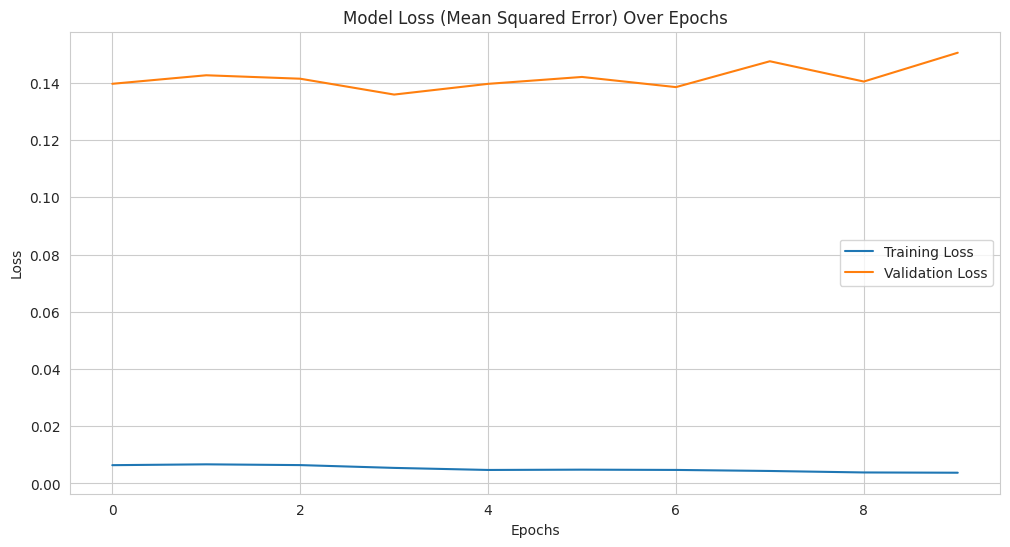

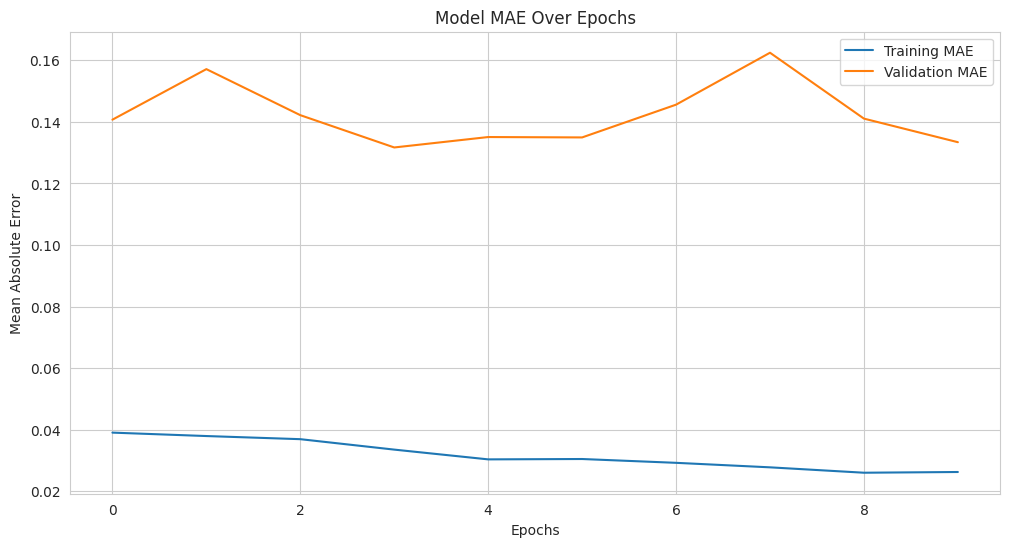

In [ ]:
import matplotlib.pyplot as plt

# Plotting loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Mean Squared Error) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting MAE (accuracy in this context)
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()


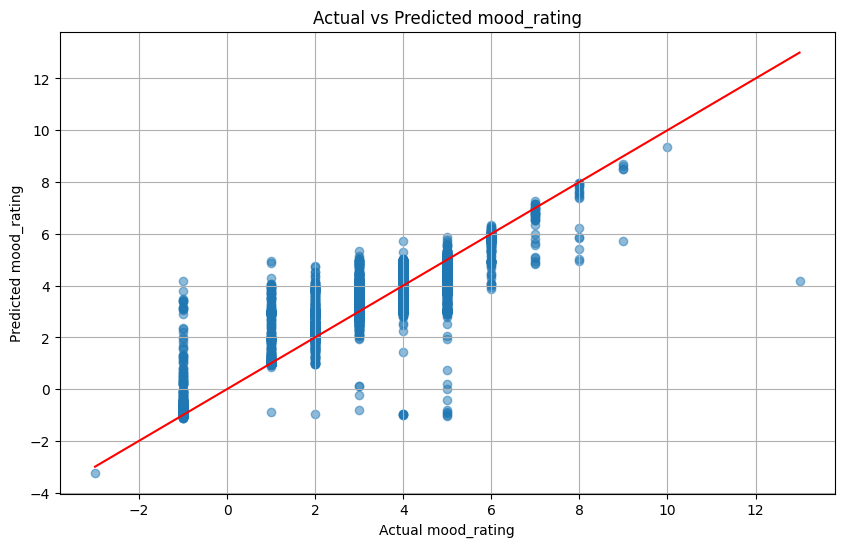

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual mood_rating')
plt.ylabel('Predicted mood_rating')
plt.title('Actual vs Predicted mood_rating')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # diagonal line
plt.grid(True)
plt.show()


The red dashed line represents the line of perfect prediction. Points above this line suggest that the model underpredicted those values, while points below the line indicate overpredictions.

This visualization can help you understand the areas where your model might be performing better or worse.

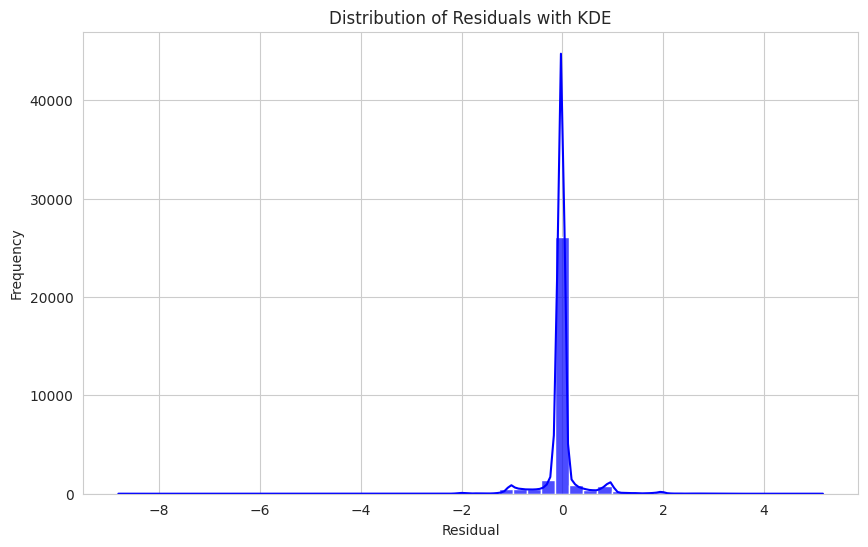

In [ ]:
residuals = predictions.flatten() - y_test
import seaborn as sns

# Set a style for seaborn
sns.set_style('whitegrid')

# Create a combined plot with histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='blue', alpha=0.7)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals with KDE')
plt.show()


---

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Data/mood_data.csv')

In [ ]:
print(data['userid'].nunique())
print(data['tripid'].nunique())
print(data['legid'].nunique())

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

df = data.copy()
# Assuming df is your dataframe
y = df['worthwhileness_rating']
X = df.drop('worthwhileness_rating', axis=1)

# List of numerical and categorical columns
numerical_cols = ['true_distance', 'leg_distance', 'leg_duration', 'average_speed', 'max_speed', 'distance', 'duration', 'mood_rating']
categorical_cols = ['class', 'transport_category', 'weekday', 'weekday_class', 'os', 'gender', 'age_range', 'education_level']

# Build transformer for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))  # Single neuron for regression output

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
3973/3973 [==============================] - 9s 2ms/step - loss: 4.3062 - mae: 1.6543 - val_loss: 3.7578 - val_mae: 1.5054
Epoch 2/10
3973/3973 [==============================] - 8s 2ms/step - loss: 3.8787 - mae: 1.5193 - val_loss: 3.6759 - val_mae: 1.4893
Epoch 3/10
3973/3973 [==============================] - 8s 2ms/step - loss: 3.7684 - mae: 1.4909 - val_loss: 3.6038 - val_mae: 1.4485
Epoch 4/10
3973/3973 [==============================] - 8s 2ms/step - loss: 3.7027 - mae: 1.4693 - val_loss: 3.5294 - val_mae: 1.4337
Epoch 5/10
3973/3973 [==============================] - 8s 2ms/step - loss: 3.6647 - mae: 1.4581 - val_loss: 3.4967 - val_mae: 1.4281
Epoch 6/10
3973/3973 [==============================] - 8s 2ms/step - loss: 3.6346 - mae: 1.4461 - val_loss: 3.4993 - val_mae: 1.3799
Epoch 7/10
3973/3973 [==============================] - 8s 2ms/step - loss: 3.6084 - mae: 1.4384 - val_loss: 3.5791 - val_mae: 1.4525
Epoch 8/10
3973/3973 [==============================] - 8s 2ms

In [1]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow.keras import layers

# # Sample dataframe
# data_df = data.copy()

# # Define the features and the target variable
# features = data_df.drop('worthwhileness_rating', axis=1)
# target = data_df['worthwhileness_rating']

# # List of numerical and categorical columns
# numerical_cols = ['true_distance', 'leg_distance', 'leg_duration', 'average_speed', 'max_speed', 'distance', 'duration', 'mood_rating']
# categorical_cols = ['class', 'transport_category', 'weekday', 'weekday_class', 'os', 'gender', 'age_range', 'education_level']

# # Create the column transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
#     ])

# Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# # Preprocess the data
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)

# # Build the model
# model = tf.keras.Sequential([
#     layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     layers.Dropout(0.2),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
